## Imports

In [1]:
import os
import sys
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Data

In [2]:
# Load in data

in_file_path = os.path.join(os.getcwd(), 'Data//Isolated', 'input.txt')
out_file_path = os.path.join(os.getcwd(), 'Data//Isolated', 'output.txt')

inp = pd.read_csv(in_file_path,sep="	",header=None)
out = pd.read_csv(out_file_path,sep="	",header=None)
out_save = out.copy()

In [3]:
out=out_save.copy()
a=out.copy()
b=out.copy()
a=a.iloc[:,0:88]
b=b.iloc[:,100]
out=pd.concat([a,b],axis=1,ignore_index=True)

In [4]:
display(inp.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,2.251939,4.503877,4.503877,5.267735,5.267735,5.267735,5.267735,5.267735,5.267735,...,3.732886,3.379731,3.444591,2.619926,2.617579,2.536714,1.753817,1.576958,1.459010,1.266897
2,0,3.096148,6.192296,6.192296,6.878340,6.878340,6.878340,6.878340,6.878340,6.878340,...,1.640871,1.772594,1.821867,1.578366,1.714497,1.358405,1.881643,1.843069,1.829970,1.540454
3,0,2.584332,5.168665,5.168665,7.360459,7.360459,7.360459,7.360459,7.360459,7.360459,...,0.594425,-0.334698,-0.430611,0.502820,0.068937,0.143158,0.118356,0.072981,-0.281706,0.075947
4,0,3.000714,6.001429,6.001429,6.701647,6.701647,6.701647,6.701647,6.701647,6.701647,...,-0.623231,0.371712,0.470023,0.162091,0.221460,0.250500,0.530187,0.159522,0.305749,0.009385
5,0,2.751009,5.502019,5.502019,6.621682,6.621682,6.621682,6.621682,6.621682,6.621682,...,0.633103,0.263561,-0.168876,0.346169,-0.440816,0.384683,-0.051109,0.221751,0.035686,0.602832
6,0,2.642939,5.285878,5.285878,6.867776,6.867776,6.867776,6.867776,6.867776,6.867776,...,-0.890348,-0.869460,-0.617617,-0.647156,-0.466353,-0.895708,-0.513983,-1.051126,-0.645904,-1.380035
7,0,2.371071,4.742141,4.742141,7.653968,7.653968,7.653968,7.653968,7.653968,7.653968,...,0.084704,0.522521,0.457197,0.300003,0.246175,0.269324,0.340245,0.608106,0.927223,1.058712
8,0,2.403097,4.806194,4.806194,4.775225,4.775225,4.775225,4.775225,4.775225,4.775225,...,0.332082,0.043317,-0.011749,-0.175405,1.035872,0.576066,0.032425,0.454823,0.370297,0.560443
9,0,2.462601,4.925202,4.925202,5.128348,5.128348,5.128348,5.128348,5.128348,5.128348,...,0.251075,0.582727,0.905515,0.560194,0.005657,0.148847,0.304870,0.414894,-0.168880,-0.491118


In [5]:
display(out.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get some info

In [6]:
count_empty = np.sum(out.iloc[:,out.shape[1]-1],axis=0)
count_not_empty = out.shape[0] - count_empty
print('Empty instances:',count_empty)
print('Not empty instances:',count_not_empty)


Empty instances: 10402
Not empty instances: 8785


In [7]:
only_notes=out.iloc[:,0:out.shape[1]-1]
count_notes = np.sum(only_notes,axis=1)
single_note_idx = np.where(count_notes==1)[0]
count_notes_hot = pd.get_dummies(count_notes)
out_hot=pd.concat([only_notes,count_notes_hot],axis=1,ignore_index=True).iloc[:,0:90]
display(out_hot.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
empty = out_hot.iloc[:,out.shape[1]-1].get_values()
empty_idx = np.where(empty==1)[0]
not_empty_idx = np.where(empty==0)[0]

# How many empty?
num_empty = 700

# Get random empty index
ii = random.sample(range(0,empty_idx.shape[0]),num_empty)
rand_empty_idx = empty_idx[ii]

# Get single notes
i1 = np.intersect1d(not_empty_idx,single_note_idx)

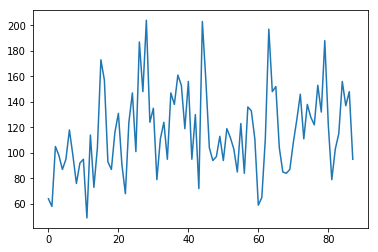

In [9]:
plt.plot(np.sum(out.iloc[:,0:out.shape[1]-1],axis=0))

In [10]:
# Split no note info
X_n = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_n = pd.concat([out.iloc[i1,0:out.shape[1]-1],out.iloc[rand_empty_idx,0:out.shape[1]-1]],axis=0,ignore_index=True)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,train_size=0.80,test_size=0.20)
print('X_train_n shape:',X_train_n.shape)
print('y_train_n shape:',y_train_n.shape)
print('X_test_n shape:',X_test_n.shape)
print('y_test_n shape:',y_test_n.shape)

X_train_n shape: (6408, 396)
y_train_n shape: (6408, 88)
X_test_n shape: (1603, 396)
y_test_n shape: (1603, 88)


In [11]:
# Split with empty
X_e = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_e = pd.concat([out.iloc[i1,:],out.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_e,y_e,train_size=0.80,test_size=0.20)
print('X_train_e shape:',X_train_e.shape)
print('y_train_e shape:',y_train_e.shape)
print('X_test_e shape:',X_test_e.shape)
print('y_test_e shape:',y_test_e.shape)

X_train_e shape: (6408, 396)
y_train_e shape: (6408, 89)
X_test_e shape: (1603, 396)
y_test_e shape: (1603, 89)


In [12]:
# Split note one_hot
X_h = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_h = pd.concat([out_hot.iloc[i1,:],out_hot.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h,y_h,train_size=0.80,test_size=0.20)
print('X_train_h shape:',X_train_h.shape)
print('y_train_h shape:',y_train_h.shape)
print('X_test_h shape:',X_test_h.shape)
print('y_test_h shape:',y_test_h.shape)
print('y_h shape:',y_h.shape)

X_train_h shape: (6408, 396)
y_train_h shape: (6408, 90)
X_test_h shape: (1603, 396)
y_test_h shape: (1603, 90)
y_h shape: (8011, 90)


## Training

In [13]:
# Single layer, no note info
model_s_n = keras.Sequential()
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='relu',input_dim=X_n.shape[1]))
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='softmax'))
model_s_n.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_n.fit(X_train_n,y_train_n,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
6408/6408 [==============================] - 1s 102us/step - loss: 3.9856 - acc: 0.0378
Epoch 2/50
6408/6408 [==============================] - 1s 88us/step - loss: 3.5641 - acc: 0.1096
Epoch 3/50
6408/6408 [==============================] - 1s 78us/step - loss: 3.1520 - acc: 0.2001
Epoch 4/50
6408/6408 [==============================] - 1s 87us/step - loss: 2.7558 - acc: 0.2892
Epoch 5/50
6408/6408 [==============================] - 0s 69us/step - loss: 2.3994 - acc: 0.3727
Epoch 6/50
6408/6408 [==============================] - 0s 73us/step - loss: 2.1157 - acc: 0.4226
Epoch 7/50
6408/6408 [==============================] - 0s 68us/step - loss: 1.8789 - acc: 0.4772
Epoch 8/50
6408/6408 [==============================] - 0s 72us/step - loss: 1.6986 - acc: 0.5097
Epoch 9/50
6408/6408 [==============================] - 0s 70us/step - loss: 1.5377 - acc: 0.5429
Epoch 10/50
6408/6408 [==============================] - 0s 76us/step - loss: 1.4211 - acc: 0.5693
Epoch 11/50
6408/6

In [14]:
# Single layer, with empty
model_s_e = keras.Sequential()
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='relu',input_dim=X_e.shape[1]))
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='softmax'))
model_s_e.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_e.fit(X_train_e,y_train_e,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
6408/6408 [==============================] - 1s 157us/step - loss: 4.4082 - acc: 0.0822
Epoch 2/50
6408/6408 [==============================] - 1s 120us/step - loss: 3.9859 - acc: 0.1656
Epoch 3/50
6408/6408 [==============================] - 1s 133us/step - loss: 3.5435 - acc: 0.2445
Epoch 4/50
6408/6408 [==============================] - 1s 118us/step - loss: 3.1190 - acc: 0.3321
Epoch 5/50
6408/6408 [==============================] - 1s 118us/step - loss: 2.7479 - acc: 0.3926
Epoch 6/50
6408/6408 [==============================] - 1s 108us/step - loss: 2.4237 - acc: 0.4674
Epoch 7/50
6408/6408 [==============================] - 1s 112us/step - loss: 2.1635 - acc: 0.5172
Epoch 8/50
6408/6408 [==============================] - 1s 111us/step - loss: 1.9564 - acc: 0.5643
Epoch 9/50
6408/6408 [==============================] - 1s 125us/step - loss: 1.7807 - acc: 0.5933
Epoch 10/50
6408/6408 [==============================] - 0s 75us/step - loss: 1.6427 - acc: 0.6175
Epoch 11/5

In [15]:
# Single layer, one hot encoding for notes
model_s_h = keras.Sequential()
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='relu',input_dim=X_h.shape[1]))
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='softmax'))
model_s_h.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_h.fit(X_train_h,y_train_h,epochs=50, batch_size=32)

Epoch 1/50
6408/6408 [==============================] - 1s 117us/step - loss: 6.0384 - acc: 3.1211e-04
Epoch 2/50
6408/6408 [==============================] - 0s 75us/step - loss: 5.3412 - acc: 0.0014
Epoch 3/50
6408/6408 [==============================] - 0s 74us/step - loss: 4.8826 - acc: 0.0075
Epoch 4/50
6408/6408 [==============================] - 0s 71us/step - loss: 4.4694 - acc: 0.0239
Epoch 5/50
6408/6408 [==============================] - 1s 86us/step - loss: 4.1363 - acc: 0.0465
Epoch 6/50
6408/6408 [==============================] - 1s 78us/step - loss: 3.8504 - acc: 0.0749
Epoch 7/50
6408/6408 [==============================] - 1s 87us/step - loss: 3.6241 - acc: 0.0944
Epoch 8/50
6408/6408 [==============================] - 1s 83us/step - loss: 3.4171 - acc: 0.1181
Epoch 9/50
6408/6408 [==============================] - 1s 86us/step - loss: 3.2657 - acc: 0.1576
Epoch 10/50
6408/6408 [==============================] - 0s 71us/step - loss: 3.1280 - acc: 0.1891
Epoch 11/50
64

In [16]:
y_pred_n = model_s_n.predict(X_test_n,batch_size=32)
y_pred_e = model_s_e.predict(X_test_e,batch_size=32)
y_pred_h = model_s_h.predict(X_test_h,batch_size=32)
threshold = 0.4

In [17]:
# General Accuracy
def general_acc(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],y_true[i,:])):
            j=j+1
    return (j/y_true.shape[0])

In [18]:
# Empty Accuracy
def empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i],z)):
                j=j+1
    return (j/k)

In [19]:
# Non Empty Accuracy
def non_empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (not np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i,:],y_pred[i,:])):
                j=j+1
    return (j/k)

## Method 1

In [24]:
y_note_pred_n = y_pred_n.copy()
y_note_pred_n[y_note_pred_n<threshold]=0
y_note_pred_n[y_note_pred_n>=threshold]=1
y_note_test_n=y_test_n.get_values()

In [25]:
general_acc_n = general_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('General Accuracy:',general_acc_n)

General Accuracy: 0.7698066126013724


In [26]:
empty_acc_n=empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Empty Accuracy:',empty_acc_n)

Empty Accuracy: 0.3435114503816794


In [29]:
non_empty_acc_n=non_empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Non Empty Accuracy:', non_empty_acc_n)

Non Empty Accuracy: 0.8530947054436987


## Method 2

In [30]:
a = y_pred_e.copy()
threshold_pred_e = np.zeros_like(a)
threshold_pred_e[np.arange(len(a)),a.argmax(1)]=1
y_note_pred_e = threshold_pred_e[:,0:88]
y_note_test_e = y_test_e.iloc[:,0:88].get_values()

In [31]:
general_acc_e = general_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('General Accuracy:',general_acc_e)

General Accuracy: 0.8159700561447286


In [32]:
empty_acc_e=empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Empty Accuracy:',empty_acc_e)

Empty Accuracy: 0.6956521739130435


In [33]:
non_empty_acc_e=non_empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Non Empty Accuracy:', non_empty_acc_e)

Non Empty Accuracy: 0.8315715292459479


## Method 3

In [35]:
num_pred = y_pred_h.copy()
threshold_pred_h = y_pred_h.copy()[:,0:88]
num_pred = num_pred[:,88:num_pred.shape[1]]

num_pred_bin = np.zeros_like(num_pred)
num_pred_bin[np.arange(len(num_pred)),num_pred.argmax(1)]=1

for i in range(y_test_h.shape[0]):
    if (num_pred_bin[i,0]==1):
        threshold_pred_h[i,:] = np.zeros(88)
    else:
        a=threshold_pred_h[i].copy()
        max_val = np.max(a)
        a[np.where(a==np.max(a))] = 1
        a[np.where(a!=1)] = 0
        threshold_pred_h[i,:]=a
        
y_note_pred_h = threshold_pred_h[:,0:88]
y_note_test_h = y_test_h.iloc[:,0:88].get_values()

In [36]:
general_acc_h = general_acc(y_pred=threshold_pred_h[:,0:88],y_true=y_test_h.iloc[:,0:88].get_values())
print('General Accuracy:',general_acc_h)

General Accuracy: 0.8066126013724267


In [37]:
empty_acc_h=empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Empty Accuracy:',empty_acc_h)

Empty Accuracy: 0.8076923076923077


In [38]:
non_empty_acc_h=non_empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Non Empty Accuracy:', non_empty_acc_h)

Non Empty Accuracy: 0.8065173116089613
